In [1]:
import grid2op
import numpy as np
import torch
from grid2op.PlotGrid import PlotMatplot

In [2]:
torch.cuda.device_count()

2

In [3]:
multimix_env = grid2op.make("l2rpn_neurips_2020_track2_small")
list(multimix_env.keys())
env = multimix_env['l2rpn_neurips_2020_track2_x2.5']
action_space = env.action_space
do_nothing = action_space({})

In [4]:
def rho_zero(obs):
    return np.where(obs.rho == 0)[0]

In [5]:
plot_helper = PlotMatplot(env.observation_space)

Run the grid by do nothing and see what happens

In [10]:
env.seed(2020)
env.set_id(2)
first_obs = env.reset()

print(f"Current env {env.name}")
print(f"Current chronic {env.chronics_handler.get_name()}")

done = False
survived_steps = 0
obs = env.current_obs
act = do_nothing
while not done:
    if survived_steps == 397:
        break
    obs, reward, done, info = env.step(act)
    survived_steps += 1
print(f"Survived_steps {survived_steps}")

Current env l2rpn_neurips_2020_track2_x2.5
Current chronic Scenario_april_09
Survived_steps 397


In [12]:
obs.time_before_cooldown_line

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 96,
        0,  0,  0, 96,  0,  0,  0,  0,  0, 96,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       96,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, 96,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, 96,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, 96,  0,  0,  0, 96, 96,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       96,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, 95,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int32)

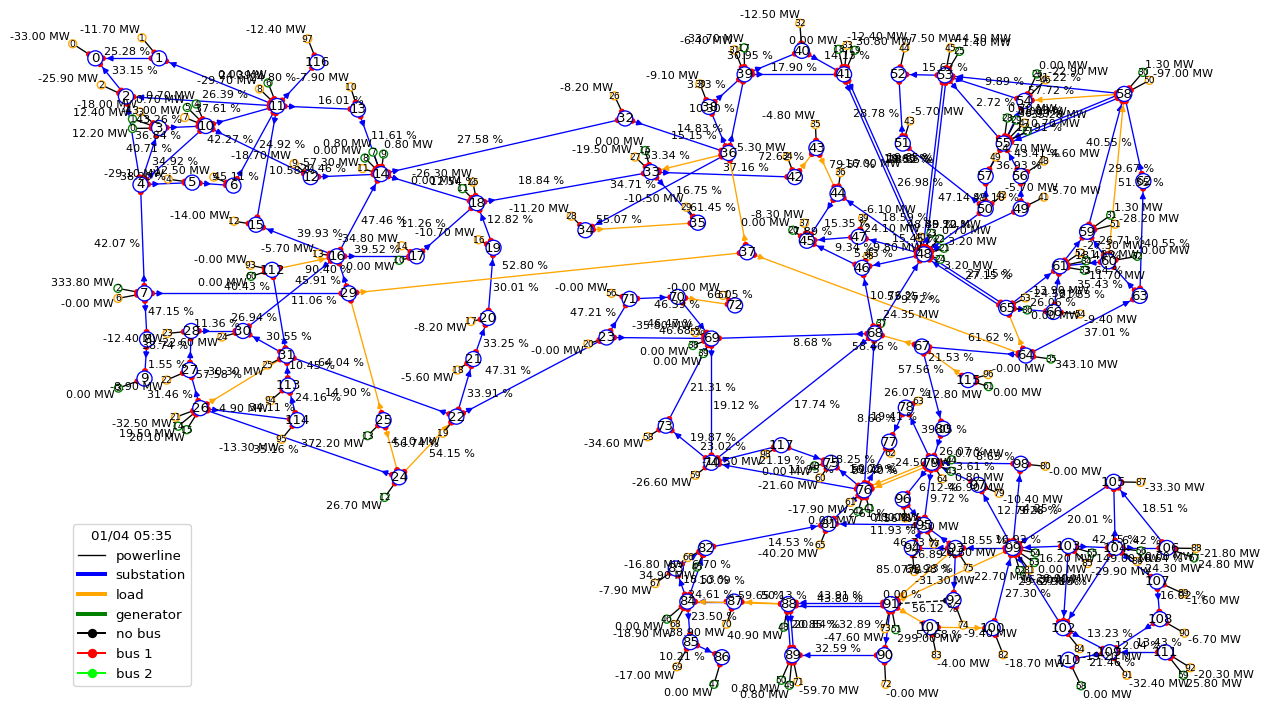

In [153]:
plot_helper.plot_obs(obs)

In [154]:
np.where(obs.timestep_overflow >= 3)

(array([], dtype=int64),)

In [155]:
np.where(obs.line_status == False)

(array([37]),)

In [156]:
np.where(obs.rho > 1.0)

(array([], dtype=int64),)

In [162]:
obs.prod_p

array([ 12.2     ,  12.4     , 333.8     ,   0.      ,   0.7     ,
         0.7     ,   0.      ,   0.8     ,   0.      ,   0.8     ,
         0.      ,   0.      ,  26.7     , 372.2     ,  19.5     ,
        20.1     ,   0.      ,  33.7     ,   0.      ,  30.8     ,
         0.      ,   3.2     ,   0.7     ,   0.7     ,   3.2     ,
         1.4     ,   0.      ,   0.7     ,   0.7     ,   0.      ,
         1.3     ,   1.3     ,   0.      ,  11.7     ,   1.3     ,
       343.1     ,   0.      ,  24.353634,   0.      ,   0.      ,
         0.      ,   0.      ,   0.      ,   0.8     ,   0.7     ,
        34.9     ,   0.      ,   0.      ,  40.9     ,   0.8     ,
         0.8     , 299.      ,  16.3     ,   0.      ,  16.2     ,
       149.      ,   0.      ,  24.8     ,   0.      ,  25.8     ,
         0.      ,   0.      ], dtype=float32)

In [59]:
connect_17 = action_space.reconnect_powerline(line_id=17, bus_or=1, bus_ex=1)
print(connect_17)

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - force reconnection of 1 powerlines ([17])
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - Set the bus of the following element:
	 	 - assign bus 1 to line (origin) 17 [on substation 76]
	 	 - assign bus 1 to line (extremity) 17 [on substation 79]


In [60]:
obs, reward, done, info = obs.simulate(connect_17)

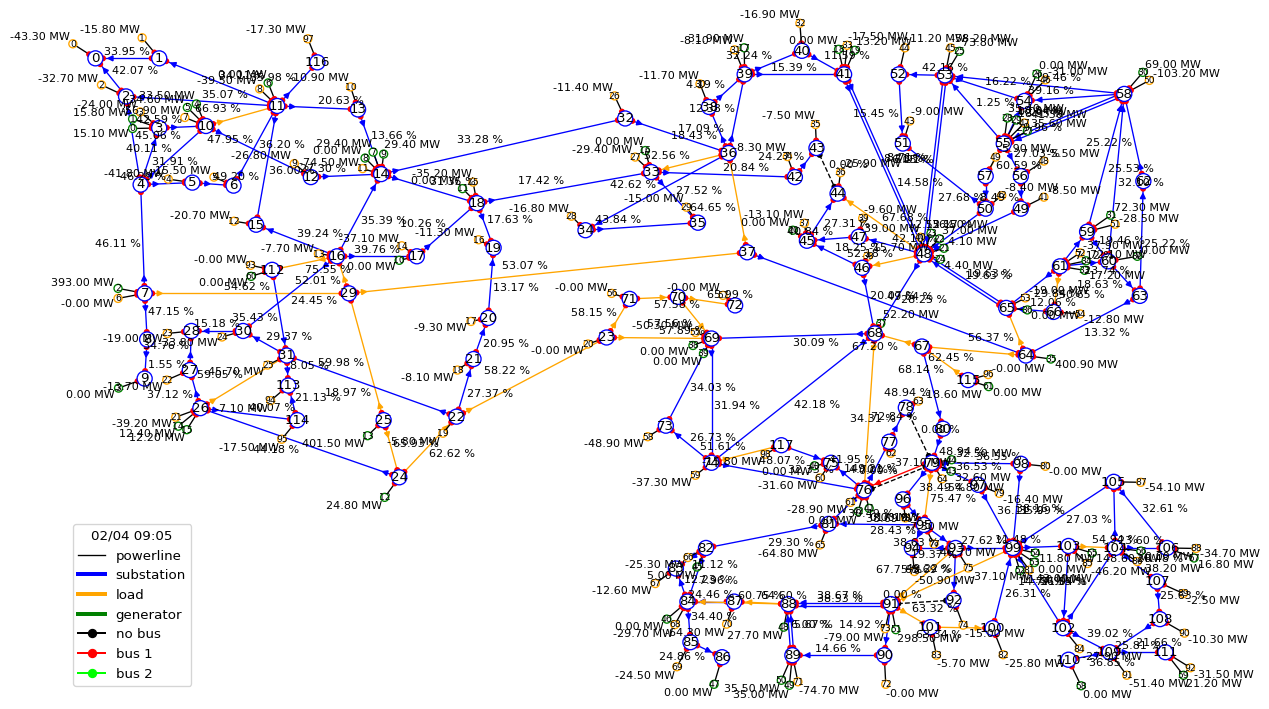

In [62]:
plot_helper.plot_obs(obs)

In [65]:
obs, reward, done, info = env.step(connect_17)

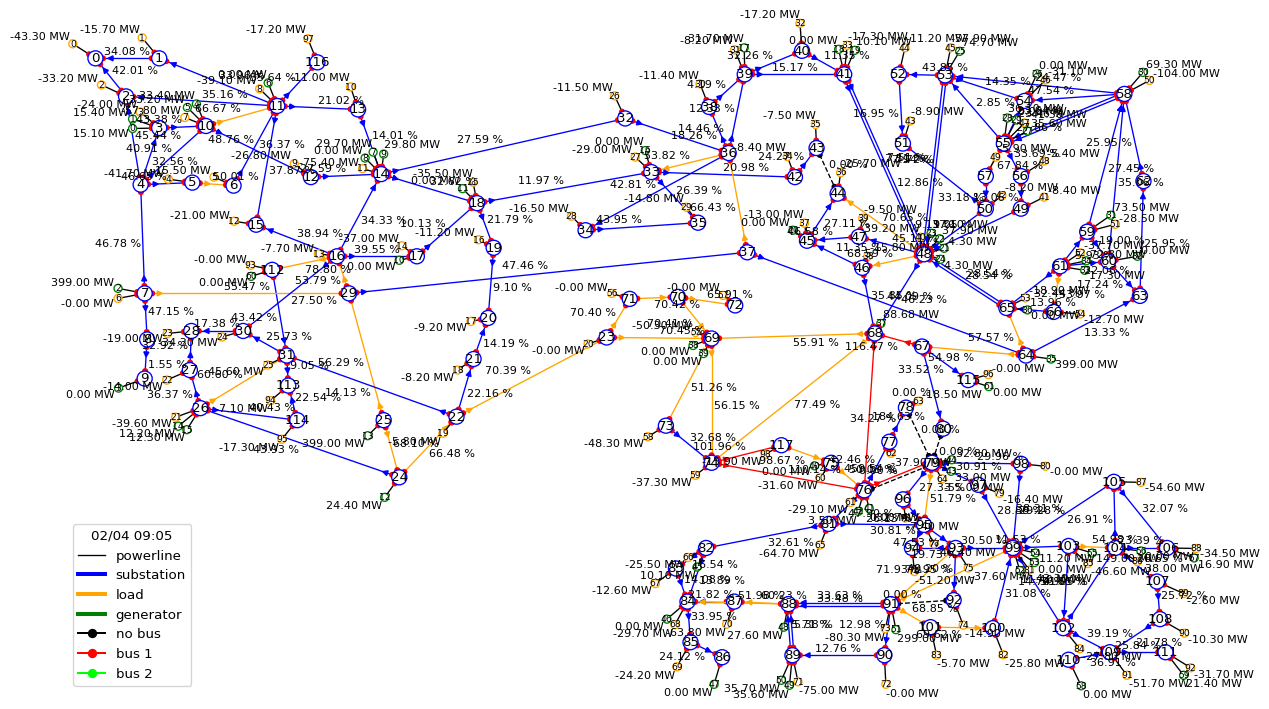

In [67]:
plot_helper.plot_obs(obs)

In [69]:
connect_18 = action_space.reconnect_powerline(line_id=18, bus_or=1, bus_ex=1)
print(connect_18)

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - force reconnection of 1 powerlines ([18])
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - Set the bus of the following element:
	 	 - assign bus 1 to line (origin) 18 [on substation 76]
	 	 - assign bus 1 to line (extremity) 18 [on substation 79]


In [70]:
obs, reward, done, info = obs.simulate(connect_18)

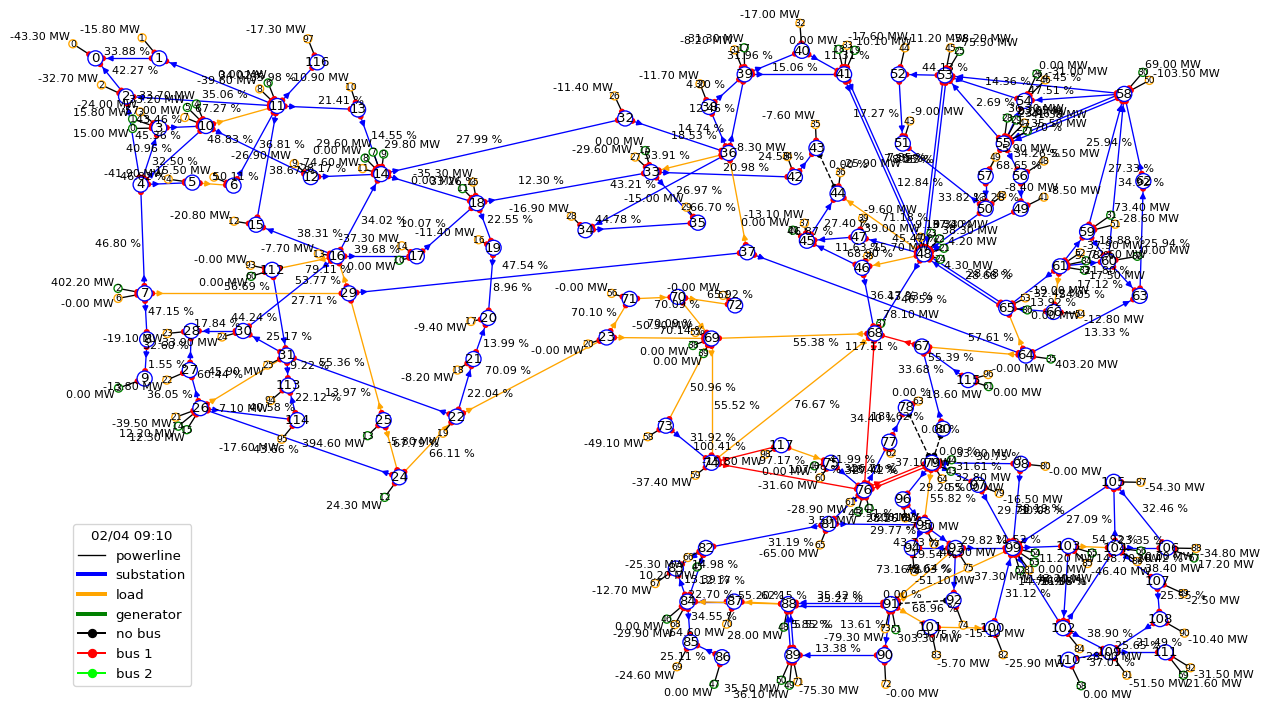

In [72]:
plot_helper.plot_obs(obs)

In [76]:
obs, reward, done, info = env.step(connect_18)
done

False

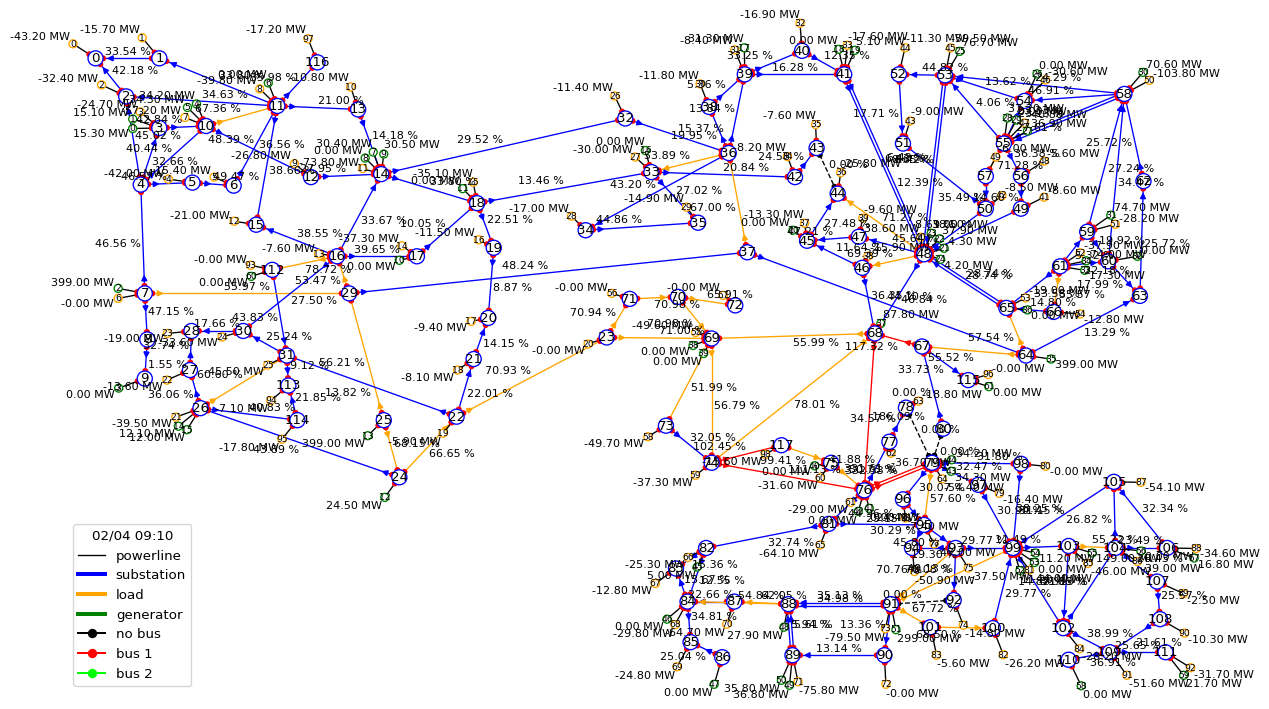

In [77]:
plot_helper.plot_obs(obs)

In [79]:
connect_19 = action_space.reconnect_powerline(line_id=19, bus_or=1, bus_ex=1)

In [80]:
obs, reward, done, info = obs.simulate(connect_19)

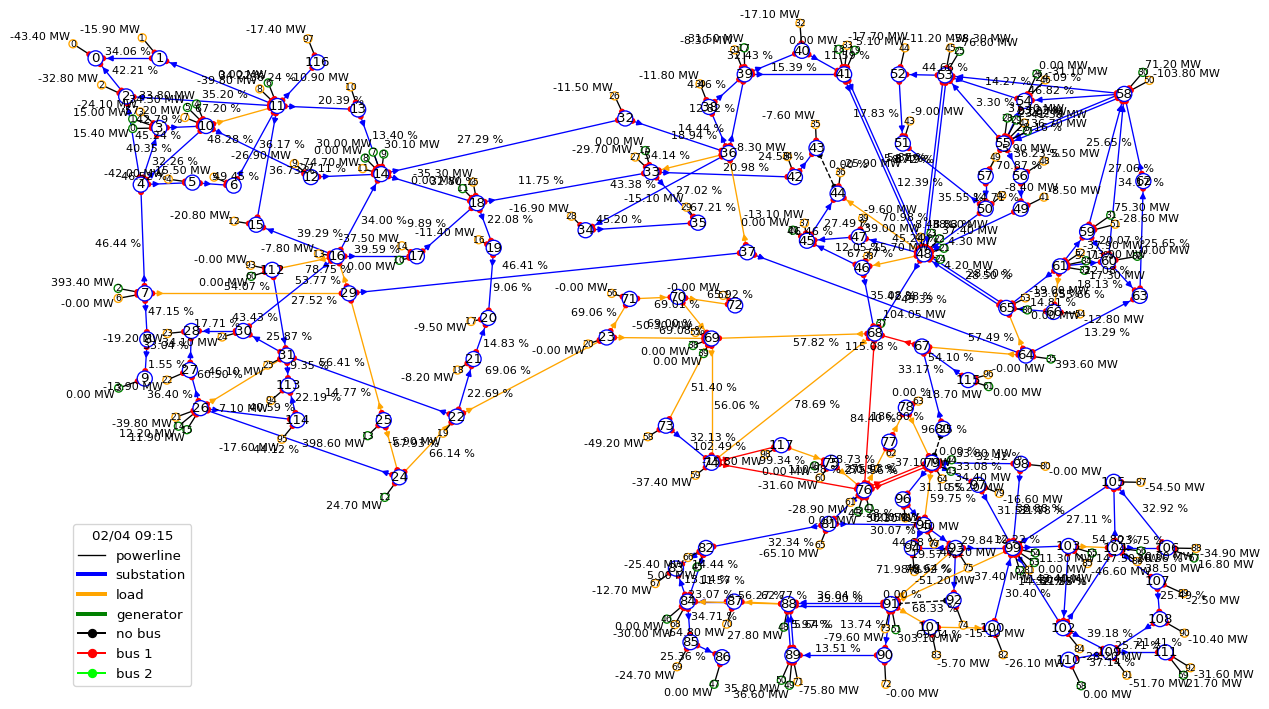

In [82]:
plot_helper.plot_obs(obs)

In [93]:
obs, reward, done, info = env.step(connect_19)
done

False

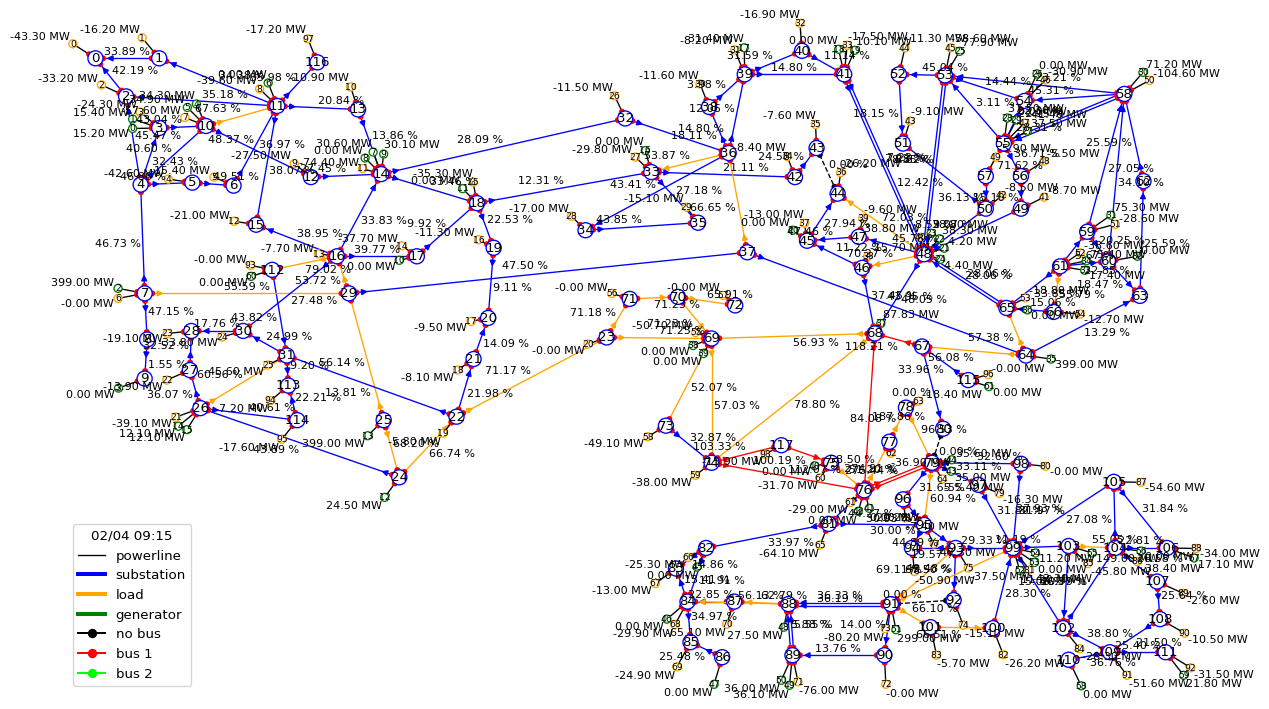

In [94]:
plot_helper.plot_obs(obs)

In [129]:
obs = env.current_obs

In [125]:
connect_37 = action_space.reconnect_powerline(line_id=37, bus_or=1, bus_ex=1)

In [126]:
_, reward, done, _ = obs.simulate(connect_37)
done

True

In [132]:
obs.timestep_overflow

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0], dtype=int32)